In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import test as t

In [38]:
data= pd.read_csv("./Downloads/lung_cancer.csv")

In [39]:
data.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO


In [40]:
data.shape

(309, 16)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [42]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [43]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [44]:
data.columns[data.isnull().sum()==0]

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [45]:
set(data.columns[np.sum(data.isnull())/data.shape[0] > 0.75])

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


set()

In [46]:
data['GENDER'].value_counts()

GENDER
M    162
F    147
Name: count, dtype: int64

In [48]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Step 1: Convert "LUNG_CANCER" using LabelEncoder
label_encoder = LabelEncoder()
data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])

# Step 2: Convert "GENDER" using OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)  # Set sparse_output=False for a dense array
gender_encoded = one_hot_encoder.fit_transform(data[['GENDER']])

# Create a DataFrame for the one-hot encoded columns
gender_columns = one_hot_encoder.get_feature_names_out(['GENDER'])
gender_df = pd.DataFrame(gender_encoded, columns=gender_columns)

# Combine the original DataFrame with the one-hot encoded "GENDER" columns
data = pd.concat([data.drop('GENDER', axis=1), gender_df], axis=1)

# Display the transformed DataFrame
print(data)


     AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
0     69        1               2        2              1                1   
1     74        2               1        1              1                2   
2     59        1               1        1              2                1   
3     63        2               2        2              1                1   
4     63        1               2        1              1                1   
..   ...      ...             ...      ...            ...              ...   
304   56        1               1        1              2                2   
305   70        2               1        1              1                1   
306   58        2               1        1              1                1   
307   67        2               1        2              1                1   
308   62        1               1        1              2                1   

     FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING 

In [53]:
from sklearn.model_selection import train_test_split
# Step 1: Define features (X) and target (y)
X = data.drop('LUNG_CANCER', axis=1)  # Features
y = data['LUNG_CANCER']              # Target
# Assume X and y are your feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes
print("Shape of training data:", X_train.shape, y_train.shape)
print("Shape of testing data:", X_test.shape, y_test.shape)


Shape of training data: (247, 16) (247,)
Shape of testing data: (62, 16) (62,)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[ 1  1]
 [ 1 59]]


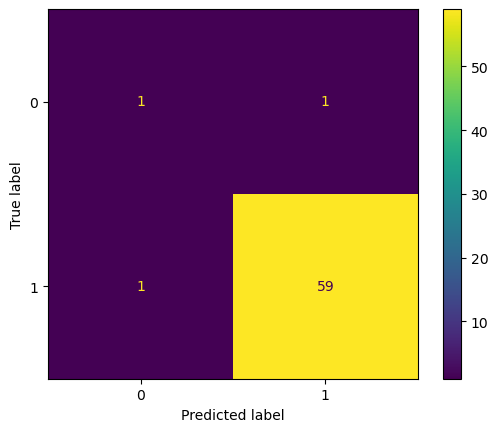

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 3: Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Optional: Display the confusion matrix visually
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

print("Confusion Matrix:\n", cm)

In [55]:
from sklearn.metrics import classification_report
# Step 5: Generate the classification report
report = classification_report(y_test, y_pred, target_names=["No Cancer", "Cancer"])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.50      0.50      0.50         2
      Cancer       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

